# Praca domowa nr 3 - Ada Gąssowska

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics

In [4]:
data=pd.read_csv("C:/Users/Ada/Desktop/australia.csv")
data = data[0:10000] #skrócenie ramki danych

## Informacje o danych

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
MinTemp          10000 non-null float64
MaxTemp          10000 non-null float64
Rainfall         10000 non-null float64
Evaporation      10000 non-null float64
Sunshine         10000 non-null float64
WindGustSpeed    10000 non-null float64
WindSpeed9am     10000 non-null float64
WindSpeed3pm     10000 non-null float64
Humidity9am      10000 non-null float64
Humidity3pm      10000 non-null float64
Pressure9am      10000 non-null float64
Pressure3pm      10000 non-null float64
Cloud9am         10000 non-null float64
Cloud3pm         10000 non-null float64
Temp9am          10000 non-null float64
Temp3pm          10000 non-null float64
RainToday        10000 non-null int64
RainTomorrow     10000 non-null int64
dtypes: float64(16), int64(2)
memory usage: 1.4 MB


In [6]:
data.drop(['RainToday','RainTomorrow'], axis=1).describe() #bez dwóch ostatnich bo kategoryczne

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14.859950,23.845800,2.474730,5.439730,7.657450,42.026700,17.672100,20.89970,65.526900,53.519600,1018.095680,1015.665330,4.071600,4.236100,18.991300,22.403700
std,5.117781,5.289492,7.346227,3.859575,3.736928,12.765911,7.859425,8.68175,15.927569,20.153963,6.218034,6.184112,2.757795,2.571307,4.635805,5.125857
min,-3.300000,9.400000,0.000000,0.000000,0.000000,13.000000,2.000000,2.00000,6.000000,1.000000,980.500000,979.000000,0.000000,0.000000,4.000000,8.200000
25%,11.600000,19.900000,0.000000,3.200000,5.200000,33.000000,13.000000,15.00000,55.000000,38.000000,1014.075000,1011.700000,1.000000,2.000000,15.900000,18.600000
50%,15.500000,23.300000,0.000000,4.800000,8.700000,41.000000,17.000000,20.00000,66.000000,56.000000,1018.200000,1015.800000,4.000000,4.000000,19.300000,21.700000
75%,18.900000,26.700000,1.000000,7.000000,10.500000,50.000000,22.000000,26.00000,77.000000,67.000000,1022.300000,1019.800000,7.000000,7.000000,22.400000,25.300000
max,29.100000,47.300000,128.000000,65.400000,14.000000,117.000000,67.000000,65.00000,100.000000,99.000000,1039.000000,1037.000000,8.000000,8.000000,37.300000,45.800000


### Rozkłady zmiennych

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A7697E808>,
      dtype=object)

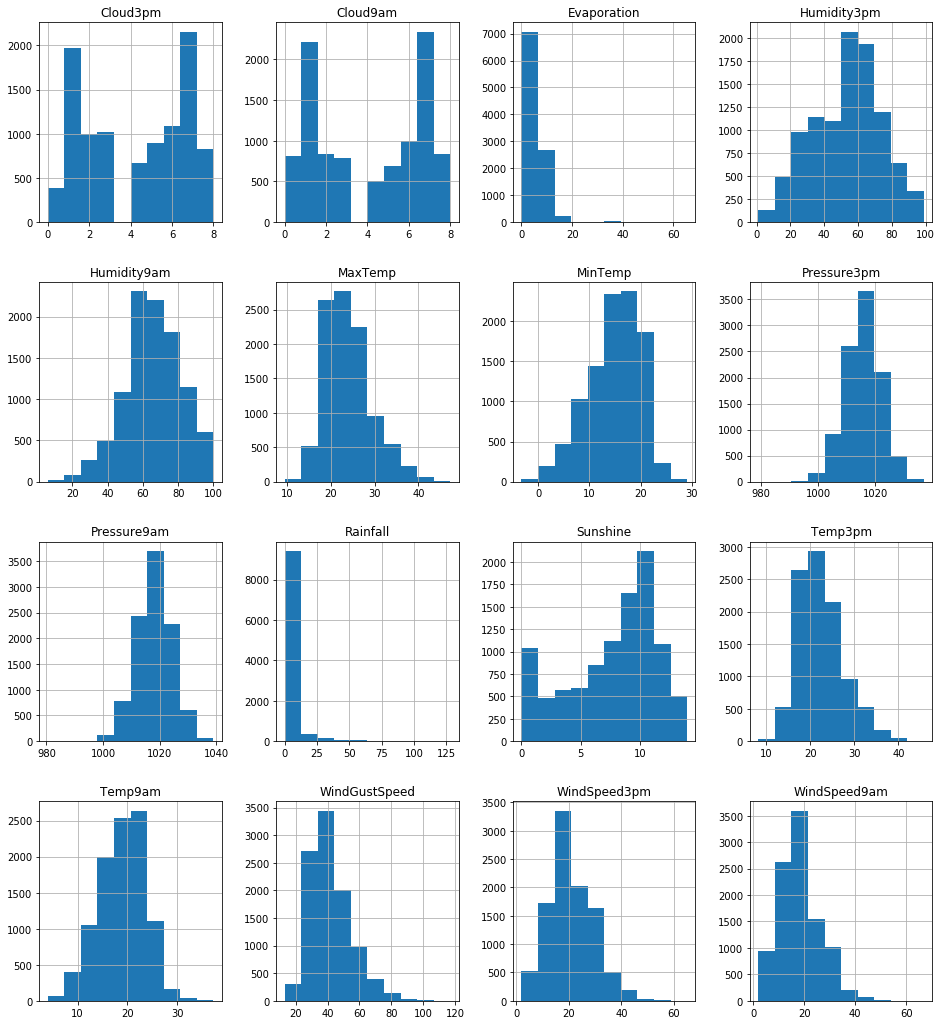

In [7]:
data.drop(["RainTomorrow", "RainToday"], axis=1).hist(figsize=(16,18))

## Podział na zbiór treningowy i zbiór testowy

In [8]:
y=data.RainTomorrow
x=data.drop('RainTomorrow',axis=1)
x.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0
5,27.1,36.1,0.0,13.0,0.0,43.0,7.0,20.0,26.0,19.0,1007.7,1007.4,8.0,8.0,30.7,34.3,0
6,23.3,34.0,0.0,9.8,12.6,41.0,17.0,19.0,33.0,15.0,1011.3,1009.9,3.0,1.0,25.0,31.5,0
7,16.1,34.2,0.0,14.6,13.2,37.0,15.0,6.0,25.0,9.0,1013.3,1009.2,1.0,1.0,20.7,32.8,0
8,19.0,35.5,0.0,12.0,12.3,48.0,30.0,9.0,46.0,28.0,1008.3,1004.0,1.0,5.0,23.4,33.3,0
9,19.7,35.5,0.0,11.0,12.7,41.0,15.0,17.0,61.0,14.0,1007.9,1005.8,1.0,5.0,24.0,33.6,0


In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
5440,14.9,20.7,2.2,5.8,10.1,52.0,30.0,28.0,66.0,52.0,1014.3,1013.7,5.0,2.0,18.2,19.4,1
2829,15.5,26.8,0.0,10.0,6.4,31.0,20.0,9.0,59.0,37.0,1018.1,1014.2,6.0,7.0,20.9,26.0,0
7932,14.6,22.2,0.2,4.0,10.0,50.0,22.0,13.0,47.0,25.0,1023.6,1023.2,1.0,1.0,17.2,21.1,0
1761,14.7,23.5,1.6,3.8,9.4,35.0,17.0,9.0,71.0,65.0,1025.2,1022.3,6.0,7.0,20.8,22.5,1
8201,11.0,22.5,0.0,6.0,11.0,37.0,9.0,30.0,30.0,31.0,1017.5,1013.0,0.0,0.0,18.4,21.4,0


### Skalowanie danych

In [10]:
standard_scaler=StandardScaler()
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.transform(x_test)

### Zróżnicowanie kolumny "Rain Tomorrow", czyli zmiennej celu

([<matplotlib.axis.XTick at 0x21a76f33fc8>,
 <a list of 2 Text xticklabel objects>)

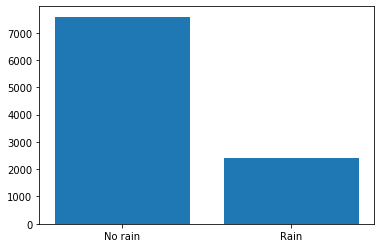

In [11]:
height = [len(data.RainTomorrow[data.RainTomorrow==0]), len(data.RainTomorrow[data.RainTomorrow==1])]
bars = ["No rain", "Rain"]
plt.bar([0,1], height)
plt.xticks([0,1], bars)

Jak widać zmienna celu nie jest zróżnicowana - dużo więcej obserwacji jest sklasyfikowanych jako "No rain" , tak więc Accuracy będzie w tym przypadku złą miarą modeli. Użyjemy więc precission&recall, F1 oraz krzywej ROC

## Regresja logistyczna


In [13]:
#model
lr = LogisticRegression(max_iter=1000, solver="sag", penalty='l2')

### Niektóre hiperparametry 

*penalty* - norma użyta w "karaniu" za błędy <br>
*max_iter* - maksymalna liczba wykonywanych iteracji <br>
*solver* - algorytm używany przy problemie optymalizacji

In [14]:
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
log_class = lr.predict(x_test) #predykowane klasy

In [16]:
log_prob = lr.predict_proba(x_test) #predykowane prawdopodobieństwa należności do klas
log_prob = log_prob[:,1] #dla klasy 1 - prawdopodobieństwo że będzie padało

## Gradient Boosting

In [17]:
gb = GradientBoostingClassifier(learning_rate=0.1,n_estimators=150, loss="deviance", min_samples_split=2, min_samples_leaf=1) #tworzenie modelu

### Niektóre hiperparametry

*loss* - funkcja do optymmalizowania - 'deviance':regresja logistyczna, 'exponential': AdaBoost <br>
*n_estimators* - ile etapów boostingu chcemy wykonać <br>
*min_samples_split* - minimalna liczba próbek do podzielenia węzła (default=2) <br>
*min_samples_leaf* - minimalna liczba próbek w liściu (dafault = 1) <br>
*learning_rate* - "szybkość" uczenia się

In [18]:
gb.fit(x_train, y_train)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [19]:
gb_class = gb.predict(x_test) # predykowane klasy

In [20]:
gb_prob = gb.predict_proba(x_test) #predykowane prawdopodbieństwa należności do klas
gb_prob = gb_prob[:,1]  #dla klasy 1 - prawdopodobieństwo że będzie padało

## Decision Tree

In [21]:
dt = DecisionTreeClassifier(max_depth=5, splitter="best", min_samples_leaf=2, min_samples_split=3) #model


### Niektóre hiperparametry

*splitter* - strategia używana do podziału w każdym węźle - "best" (defalut) albo "random <br>
*criterion* - funkcja używana do oceny jakości podziału węzła <br>
*max_depth* - maksymalna głębokość drzewa <br>
*min_samples_split* - minimalna liczba próbek do podzielenia węzła (default=2) <br>
*min_samples_leaf* - minimalna liczba próbek w liściu (dafault = 1)



In [22]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
dt_class = dt.predict(x_test)


In [24]:
dt_prob=dt.predict_proba(x_test)
dt_prob=dt_prob[:,1]

# Oceny klasyfikatorów 

## Precision i Recall

### Precision


In [25]:
precision = [sklearn.metrics.precision_score(y_test, log_class),sklearn.metrics.precision_score(y_test, gb_class),sklearn.metrics.precision_score(y_test, dt_class)]
bars = ["Logistic Regression", "Gradient Booster", "Decision Tree"]
d={'method':bars, 'precision':precision}
pd.DataFrame(d)

,method,precision
0,Logistic Regression,0.711590
1,Gradient Booster,0.734104
2,Decision Tree,0.718654


Text(0.5, 1.0, 'Precision values for classifiers')

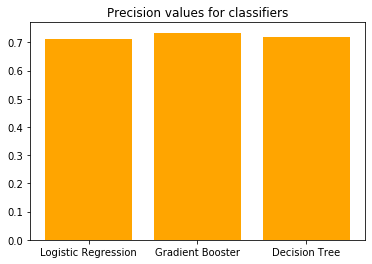

In [26]:
plt.bar([0,1,2], precision, color="orange")
plt.xticks([0,1,2], bars)
plt.title("Precision values for classifiers")



### Recall

In [27]:
recall = [sklearn.metrics.recall_score(y_test, log_class),sklearn.metrics.recall_score(y_test, gb_class),sklearn.metrics.recall_score(y_test, dt_class)]
bars = ["Logistic Regression", "Gradient Booster", "Decision Tree"]
d={'method':bars, 'recall':recall}
pd.DataFrame(d)

,method,recall
0,Logistic Regression,0.548857
1,Gradient Booster,0.528067
2,Decision Tree,0.488565


Text(0.5, 1.0, 'Recall values for classifiers')

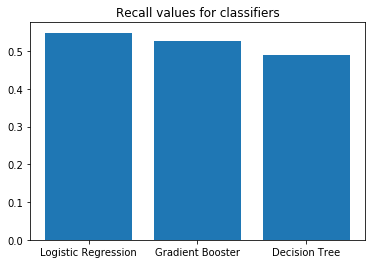

In [28]:
plt.bar([0,1,2], recall)
plt.xticks([0,1,2], bars)
plt.title("Recall values for classifiers")

### F1

In [29]:
f1 = [sklearn.metrics.f1_score(y_test, log_class),sklearn.metrics.f1_score(y_test, gb_class),sklearn.metrics.f1_score(y_test, dt_class)]
bars = ["Logistic Regression", "Gradient Booster", "Decision Tree"]
d={'method':bars, 'F1':f1}
pd.DataFrame(d)

,method,F1
0,Logistic Regression,0.619718
1,Gradient Booster,0.614268
2,Decision Tree,0.581683


Text(0.5, 1.0, 'F1 values for classifiers')

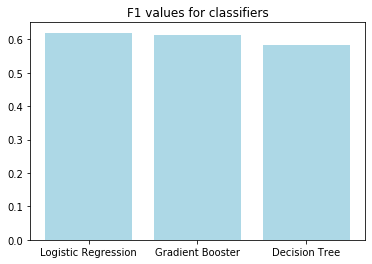

In [30]:
plt.bar([0,1,2], f1, color="lightblue")
plt.xticks([0,1,2], bars)
plt.title("F1 values for classifiers")

Wartość F1 jest prawie taka sama dla wszystkich metod, natomiast różnią się one wartością precision i recall. Największe precision ma Gradient Booster, a największe recall - Decision Tree. W tym przypadku wydaje mi się, że bardziej zależy nam na wysokiej wartości recall (chcemy jak najczęściej poprawnie ocenić czy będzie padać), więc Decision Tree wydaje się być najlepszym rozwiązaniem z tych podanych przeze mnie. 

## Krzywa ROC

In [31]:
#wyliczanie potrzebnych miar
fpr_log, tpr_log, thresholds_log = sklearn.metrics.roc_curve(y_test, log_prob)
fpr_gb, tpr_gb, thresholds_gb = sklearn.metrics.roc_curve(y_test, gb_prob) 
fpr_dt, tpr_dt, thresholds_dt = sklearn.metrics.roc_curve(y_test, dt_prob) 

Text(0, 0.5, 'TP')

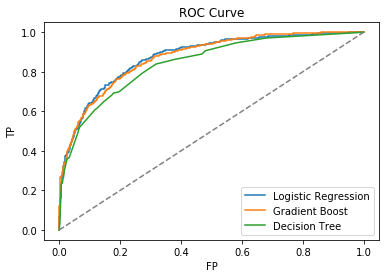

In [32]:
plt.figure()
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(fpr_gb, tpr_gb, label='Gradient Boost')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot([0,1],[0,1], '--', color="grey")
plt.title("ROC Curve")
plt.legend()
plt.xlabel("FP")
plt.ylabel("TP")

### Pole pod krzywą ROC - AUC

In [33]:
auc = [sklearn.metrics.auc(fpr_log, tpr_log), sklearn.metrics.auc(fpr_gb, tpr_gb), sklearn.metrics.auc(fpr_dt, tpr_dt)]
bars = ["Logistic Regression", "Gradient Booster", "Decision Tree"]
d={'method':bars, 'AUC':auc}
pd.DataFrame(d)

,method,AUC
0,Logistic Regression,0.875046
1,Gradient Booster,0.873359
2,Decision Tree,0.842855


Krzywe ROC dla klasyfikatorów są do siebie bardzo zbliżone. Podobnie miary AUC. Jednak Decision Tree, który wcześniej wybrałam jako najlepszy ma miarę AUC najniższą.

# Część 2 - dodatkowa praca domowa

In [34]:
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [35]:
df = pd.read_csv("https://www.dropbox.com/s/360xhh2d9lnaek3/allegro-api-transactions.csv?dl=1")

In [36]:
df=df[0:10000] #skrócenie ramki danych
df=df.drop(["lp", "date", "item_id"], axis=1)
df.head(10)

,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"
5,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,Noemi-bielizna,10.99,1,742,0,39371,GĄBIN,"Odzież, Obuwie, Dodatki"
6,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,Noemi-bielizna,10.99,1,742,0,39371,GĄBIN,"Odzież, Obuwie, Dodatki"
7,"['Biżuteria i Zegarki', 'Zegarki', 'Dziecięce']",1,1,handel_barbo,28.99,1,886,0,4287,Legionowo,Biżuteria i Zegarki
8,"['RTV i AGD', 'AGD drobne', 'Higiena i pielęgn...",1,1,jupiter2009,12.00,0,49,0,5403,zachodniopomorskie,RTV i AGD
9,"['RTV i AGD', 'Kamery', 'Zasilanie', 'Zasilacze']",1,1,e-trade-com-pl,45.00,1,4,0,15561,Warszawa,RTV i AGD


Podział zbioru na treningowy i testowy

In [37]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df['price'])

### Target encoding


In [39]:
x_train1, x_test1, y_train1, y_test1 = x_train.copy(), x_test.copy(), y_train.copy(), y_test.copy() #kopie zbiorów

In [40]:
te = ce.target_encoder.TargetEncoder(cols=["categories", "seller", "it_location", "main_category"]) #encoder

In [41]:
te_x_train = te.fit_transform(x_train1, y_train1) #kodowanie
te_x_test = te.transform(x_test1, y_test1)

In [42]:
lr_te = LinearRegression() #model
lr_te.fit(te_x_train, y_train1)
price_pred_te = lr_te.predict(te_x_test)

### Leave One Out Encoder

In [43]:
x_train2, x_test2, y_train2, y_test2 = x_train.copy(), x_test.copy(), y_train.copy(), y_test.copy() #kopie zbiorów

In [44]:
loe=ce.leave_one_out.LeaveOneOutEncoder(cols=["categories", "seller", "it_location", "main_category"]) #encoder

In [45]:
loe_x_train=loe.fit_transform(x_train2, y_train2) #kodowanie
loe_x_test=loe.transform(x_test2, y_test2)

In [46]:
lr_loe = LinearRegression() #model
lr_loe.fit(loe_x_train, y_train2)
price_pred_loe = lr_loe.predict(loe_x_test)

### James Stein Encoder

In [47]:
x_train3, x_test3, y_train3, y_test3 = x_train.copy(), x_test.copy(), y_train.copy(), y_test.copy() #kopie zbiorów

In [48]:
jse = ce.james_stein.JamesSteinEncoder(cols=["categories", "seller", "it_location", "main_category"])

In [49]:
jse_x_train=jse.fit_transform(x_train3, y_train3) #kodowanie
jse_x_test=jse.transform(x_test3, y_test3)

In [51]:
lr_jse = LinearRegression() #model
lr_jse.fit(jse_x_train, y_train3)
price_pred_jse = lr_jse.predict(jse_x_test)

## Porównanie działania trzech różnych kodowań

### R2

In [64]:
r2 = [sklearn.metrics.r2_score(y_test1, price_pred_te), sklearn.metrics.r2_score(y_test2, price_pred_loe), sklearn.metrics.r2_score(y_test3, price_pred_jse)]
d = {"Kodowanie":["Target Encoding", "Leave One Out Encoding", "James Stein Encoding"], 'R2':r2}
pd.DataFrame(d)

,Kodowanie,R2
0,Target Encoding,0.170311
1,Leave One Out Encoding,0.086591
2,James Stein Encoding,0.146606


### RMSE


In [68]:
rmse = [sklearn.metrics.mean_squared_error(y_test1, price_pred_te), sklearn.metrics.mean_squared_error(y_test2, price_pred_loe), sklearn.metrics.mean_squared_error(y_test3, price_pred_jse)]
d = {"Kodowanie":["Target Encoding", "Leave One Out Encoding", "James Stein Encoding"], 'RMSE':rmse}
pd.DataFrame(d)

,Kodowanie,RMSE
0,Target Encoding,36125.729480
1,Leave One Out Encoding,39771.026550
2,James Stein Encoding,37157.869821


 Na podstawie R2 i RMSE można stwierdzić, że wszystkie encodingi wypadły podobnie. Jednak najwyższą ( a co za tym idzie najlepszą) wartość R2 ma Target Encoding, ma on również najniższą wartość RMSE, tak więc w tym przypadku można stwierdzić, że Target Encoding sprawdził się najlepiej. 